In [40]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\amsba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import csv
from sklearn.linear_model import LinearRegression

In [143]:
readmit_df = pd.read_csv('primary.csv')
demo_df = pd.read_csv('CADemographics.csv')

mask=readmit_df['Year']==2018
readmit_df=readmit_df[mask]

demo_df['County']=demo_df['County'].str[:-7]

df = pd.merge(readmit_df,demo_df,on='County',how='inner')
df.head()
df.to_csv('dataframe.csv')

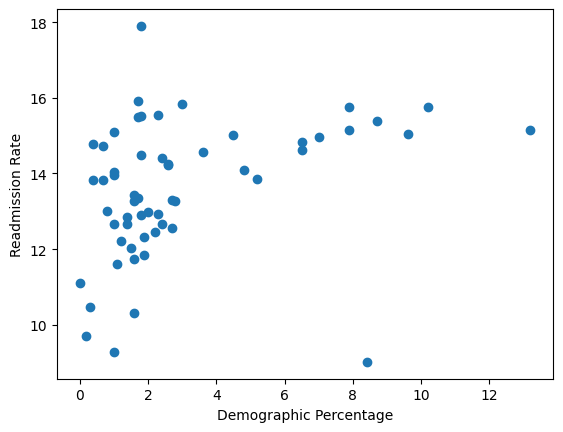

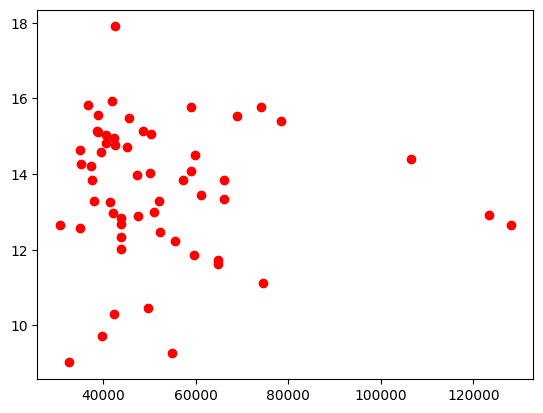

In [142]:
#plt.scatter(df['PCPI'],df['ReadmitsProp'])
plt.scatter(df['PercentBlack'],df['ReadmissionRate'])
plt.xlabel("Demographic Percentage")
plt.ylabel("Readmission Rate")
plt.show()
plt.scatter((df['PCPI']),df['ReadmissionRate'],c='r')

In [124]:
readmit_df = pd.read_csv('primary.csv')
demo_df = pd.read_csv('CADemographics.csv')

mask=readmit_df['Year']==2022
readmit_df=readmit_df[mask]

demo_df['County']=demo_df['County'].str[:-7]

df2 = pd.merge(readmit_df,demo_df,on='County',how='inner')
df2.sort_values(by='ReadmissionRate',ascending=False).head()

,Year,County,ICD,AdmitsTotal,ReadmitsTotal,ReadmissionRate,PCPI,Population,AdmitsProp,ReadmitsProp,...,PercentAIAN,PeopleAIAN,PercentHispanic,PeopleHispanic,PercentBlack,PeopleBlack,PercentWhite,PeopleWhite,PercentAPI,PeopleAPI
1,2022,Alpine,ICD-10,10.0,4.0,40.00,67603.0,1190,0.008403,0.003361,...,25.8,391,14.1,213,0.0,0,63.4,961,0.2,3
3,2022,Butte,ICD-10,17966.0,3214.0,17.89,53962.0,207369,0.086638,0.015499,...,1.1,2426,18.0,38361,1.8,3862,75.7,161779,5.6,11862
0,2022,Alameda,ICD-10,56732.0,9088.0,16.02,100836.0,1628259,0.034842,0.005581,...,0.9,14165,22.2,369603,10.2,169497,34.0,565911,32.9,547491
37,2022,San Joaquin,ICD-10,32288.0,4998.0,15.48,56363.0,794293,0.040650,0.006292,...,1.0,7932,42.5,331382,7.0,54792,42.1,328081,17.8,138648
4,2022,Calaveras,ICD-10,2524.0,386.0,15.29,55582.0,46556,0.054214,0.008291,...,1.3,592,13.6,6197,1.0,450,83.1,37974,2.0,933


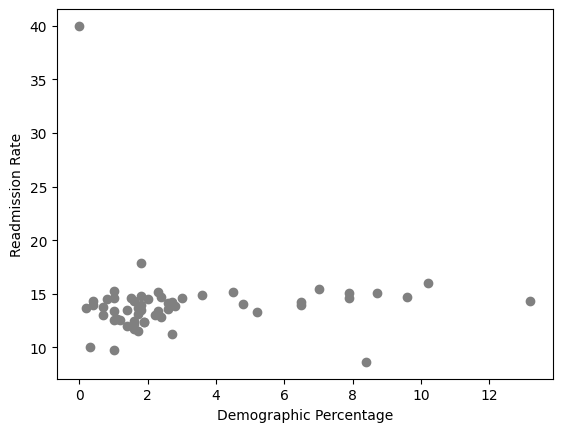

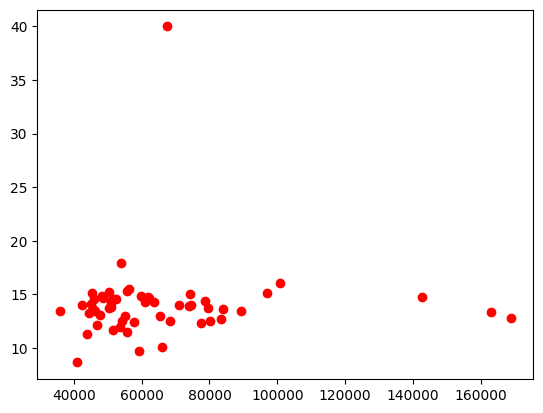

In [129]:
#plt.scatter(df2['PercentHispanic'],df2['ReadmissionRate'])
plt.scatter(df2['PercentBlack'],df2['ReadmissionRate'],c='gray')
#plt.scatter(df2['PercentHispanic'],df2['ReadmissionRate'],c='red')
#plt.scatter(df2['PercentAPI'],df2['ReadmissionRate'])
#plt.scatter(df2['PercentAIAN'],df2['ReadmissionRate'])
plt.xlabel("Demographic Percentage")
plt.ylabel("Readmission Rate")
plt.show()
plt.scatter((df2['PCPI']),df2['ReadmissionRate'],c='r')

In [154]:
tdf = pd.read_csv('FacilityList.csv')
counties = []
counts = []
for index, row in tdf.iterrows():
    if row[12] in counties:
        counts[counties.index(row[12])]+=1
    else:
        counties.append(row[12])
        counts.append(1)

df3 = pd.DataFrame({"County":counties,"HospitalCount":counts})
df3 = pd.merge(df,df3,on='County',how='inner')
df3['HospitalsPerCapita'] = df3['HospitalCount']/df3['Population']*100000
df3.to_csv('df_w_counts.csv')
df3.head()

C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\3694908478.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[12] in counties:
C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\3694908478.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counties.append(row[12])
C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\3694908478.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts[counties.index(row[12])]+=1


,Year,County,ICD,AdmitsTotal,ReadmitsTotal,ReadmissionRate,PCPI,Population,AdmitsProp,ReadmitsProp,...,PercentHispanic,PeopleHispanic,PercentBlack,PeopleBlack,PercentWhite,PeopleWhite,PercentAPI,PeopleAPI,HospitalCount,HospitalsPerCapita
0,2018,Alameda,ICD-10,62646.0,9882.0,15.77,74193.0,1666596,0.037589,0.005929,...,22.2,369603,10.2,169497,34.0,565911,32.9,547491,90,5.400229
1,2018,Amador,ICD-10,2877.0,458.0,15.92,41827.0,39349,0.073115,0.011639,...,15.1,6140,1.7,706,80.3,32583,1.3,534,2,5.082721
2,2018,Butte,ICD-10,23190.0,4151.0,17.90,42630.0,230330,0.100682,0.018022,...,18.0,38361,1.8,3862,75.7,161779,5.6,11862,15,6.512395
3,2018,Calaveras,ICD-10,2941.0,411.0,13.97,47296.0,45747,0.064288,0.008984,...,13.6,6197,1.0,450,83.1,37974,2.0,933,2,4.371871
4,2018,Colusa,ICD-10,1195.0,185.0,15.48,45624.0,21389,0.055870,0.008649,...,60.9,13280,1.7,367,60.9,13290,0.9,187,2,9.350601


In [156]:
popdens = pd.read_csv("CACountiesPopDensity.csv")
l = []
for row in popdens['County']:
    l.append(row.split(',')[0])

popdens['County'] = pd.Series(l)
df4 = pd.merge(df3,popdens,on='County',how='inner')
df4.to_csv("df4.csv")
df4.head()

,Year,County,ICD,AdmitsTotal,ReadmitsTotal,ReadmissionRate,PCPI,Population,AdmitsProp,ReadmitsProp,...,PeopleHispanic,PercentBlack,PeopleBlack,PercentWhite,PeopleWhite,PercentAPI,PeopleAPI,HospitalCount,HospitalsPerCapita,Density
0,2018,Alameda,ICD-10,62646.0,9882.0,15.77,74193.0,1666596,0.037589,0.005929,...,369603,10.2,169497,34.0,565911,32.9,547491,90,5.400229,1898.5
1,2018,Amador,ICD-10,2877.0,458.0,15.92,41827.0,39349,0.073115,0.011639,...,6140,1.7,706,80.3,32583,1.3,534,2,5.082721,61.3
2,2018,Butte,ICD-10,23190.0,4151.0,17.90,42630.0,230330,0.100682,0.018022,...,38361,1.8,3862,75.7,161779,5.6,11862,15,6.512395,132.1
3,2018,Calaveras,ICD-10,2941.0,411.0,13.97,47296.0,45747,0.064288,0.008984,...,6197,1.0,450,83.1,37974,2.0,933,2,4.371871,43.3
4,2018,Colusa,ICD-10,1195.0,185.0,15.48,45624.0,21389,0.055870,0.008649,...,13280,1.7,367,60.9,13290,0.9,187,2,9.350601,18.5


In [164]:
beds_df = pd.read_csv('healthcare_facility_beds.csv')
countyarr = []
for row in beds_df['COUNTY_NAME']:
    arr = row.lower().split(" ")
    newstr = ""
    for x in arr:
        x = x[0].upper()+x[1:]
        newstr+=(x)+" "
    countyarr.append(newstr[:-1])

beds_df['County'] = pd.Series(countyarr)


counties = []
beds = []
for index, row in beds_df.iterrows():
    if row[7] in counties:
        beds[counties.index(row[7])]+=int(row[4])
    else:
        counties.append(row[7])
        beds.append(int(row[4]))

new_bed_df = pd.DataFrame({"County":counties,"Beds":beds})

df5 = pd.merge(df4,new_bed_df,on='County',how='inner')
df5['BedsPerCapita'] = df5['Beds']/df5['Population']*1000

poverty_df = pd.read_csv('CAPoverty.csv')
df6 = pd.merge(df5,poverty_df,on="County",how="inner")

df6.to_csv('df5.csv')

C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\2347024495.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[7] in counties:
C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\2347024495.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counties.append(row[7])
C:\Users\amsba\AppData\Local\Temp\ipykernel_20200\2347024495.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beds.append(int(row[4]))
C:\Users\amsba\AppData

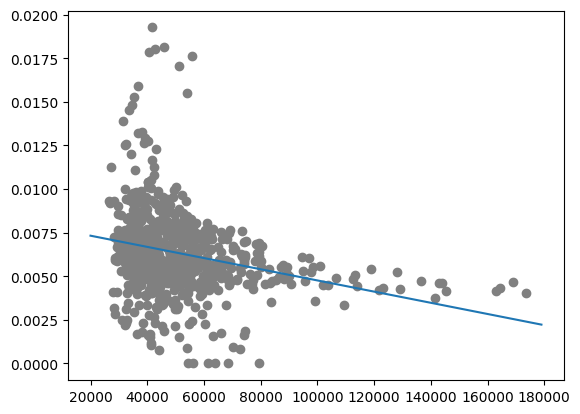

In [27]:
pf = np.polyfit(df['PCPI'], df['ReadmitsProp'], 1)
x = np.arange(20000,180000,1000)
plt.plot(x,pf[0]*x+pf[1])
plt.scatter(df['PCPI'],df['ReadmitsProp'],c='gray')
